In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

In [2]:
colvar_A=np.loadtxt('../Data/Plumed_masterclass/A/COLVAR',comments=['#'])
colvar_B=np.loadtxt('../Data/Plumed_masterclass/B/COLVAR',comments=['#'])

traj_A=md.load_xtc('../Data/Plumed_masterclass/A/traj_comp.xtc',top='../Data/Plumed_masterclass/A/confout.gro')
traj_B=md.load_xtc('../Data/Plumed_masterclass/B/traj_comp.xtc',top='../Data/Plumed_masterclass/B/confout.gro')

In [3]:
phi_indices_A, phi_A=md.compute_phi(traj_A)
psi_indices_A, psi_A=md.compute_psi(traj_A)

phi_indices_B, phi_B=md.compute_phi(traj_B)
psi_indices_B, psi_B=md.compute_psi(traj_B)

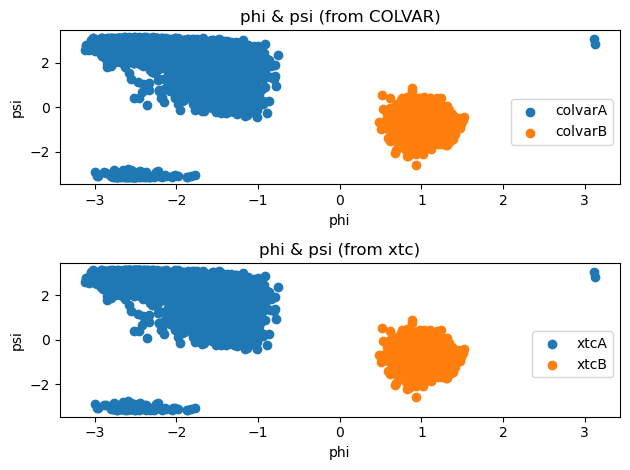

In [4]:
plt.subplot(211)
plt.scatter(colvar_A[:,1],colvar_A[:,2],label='colvarA')
plt.scatter(colvar_B[:,1],colvar_B[:,2],label='colvarB')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi & psi (from COLVAR)')


plt.subplot(212)
plt.scatter(phi_A[::10],psi_A[::10],label='xtcA')
plt.scatter(phi_B[::10],psi_B[::10],label='xtcB')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi & psi (from xtc)')

plt.tight_layout()

In [5]:
phi_Asd=np.std(phi_A)
psi_Asd=np.std(psi_A)

phi_Bsd=np.std(phi_B)
psi_Bsd=np.std(psi_B)

print('phi_Asd='+str(phi_Asd))
print('psi_Asd='+str(psi_Asd))
print('phi_Bsd='+str(phi_Bsd))
print('psi_Bsd='+str(psi_Bsd))

phi_Asd=0.5538316
psi_Asd=1.024898
phi_Bsd=0.13238177
psi_Bsd=0.34453443


## Task3

In [11]:
task3_grid=np.loadtxt('../Data/Lugano_tutorial/lugano.grid.dat',comments=['#'])
task3_colvar=np.loadtxt('../Data/Lugano_tutorial/COLVAR',comments=['#'])
task3_hills=np.loadtxt('../Data/Lugano_tutorial/HILLS',comments=['#'])

Text(0, 0.5, 'Phi')

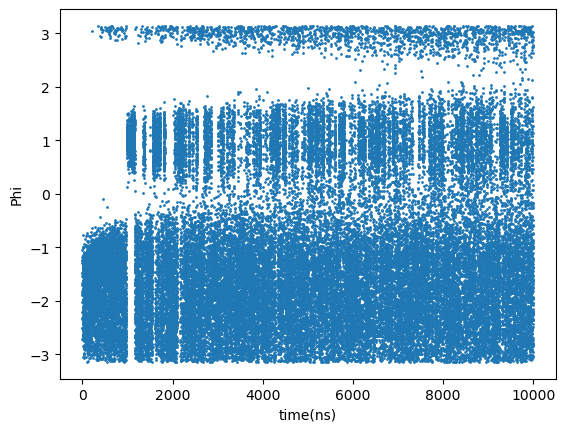

In [22]:
plt.scatter(task3_colvar[:,0][::10],task3_colvar[:,1][::10],s=1)
plt.xlabel('time(ns)')
plt.ylabel('Phi')

Text(0.5, 1.0, 'Time evolution of the Gaussian height')

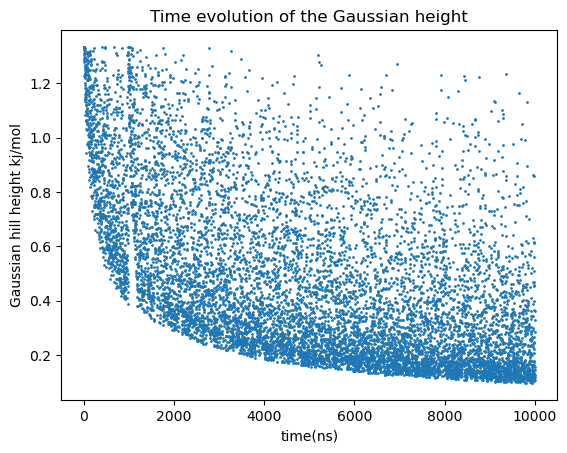

In [30]:
plt.scatter(task3_hills[:,0],task3_hills[:,5],s=1)
plt.xlabel('time(ns)')
plt.ylabel('Gaussian hill height kj/mol')
plt.title('Time evolution of the Gaussian height')

Text(0, 0.5, 'free energy/ kj mol$^{-1}$')

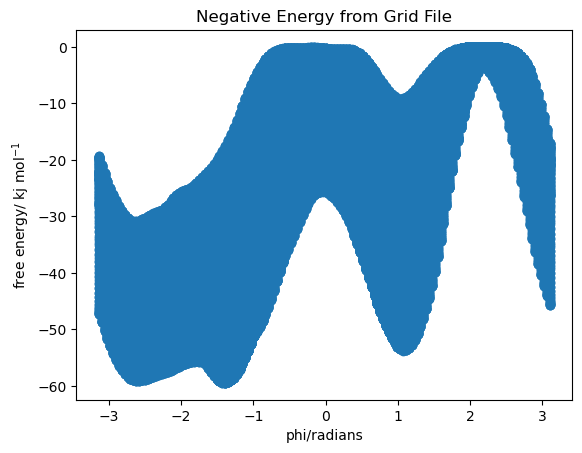

In [52]:
plt.scatter(task3_grid[:,0],-task3_grid[:,2])
plt.title('Negative Energy from Grid File')
plt.xlabel('phi/radians')
plt.ylabel('free energy/ kj mol$^{-1}$')

Text(0, 0.5, 'free energy/ kj mol$^{-1}$')

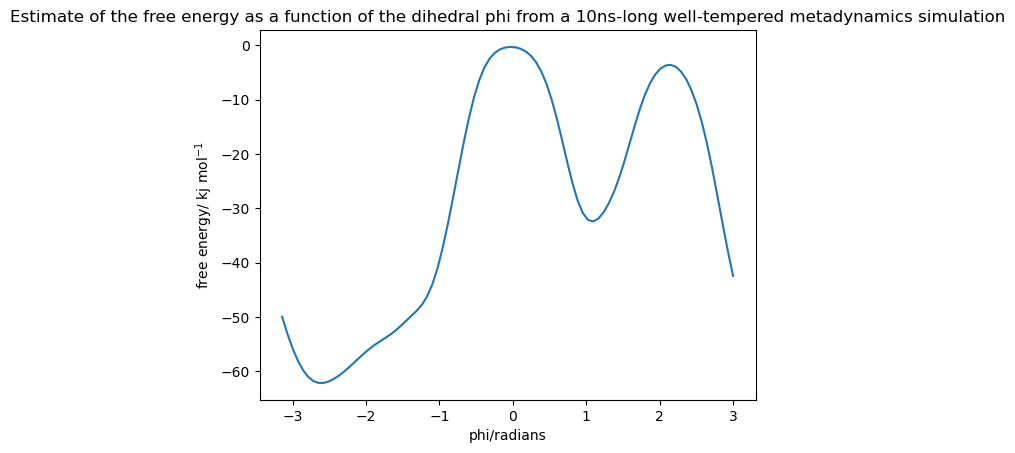

In [40]:
task4_fes=np.loadtxt('../Data/Lugano_tutorial/fes.dat',comments=['#'])
plt.plot(task4_fes[:88,0],task4_fes[:88,2])
plt.title('Estimate of the free energy as a function of the dihedral phi from a 10ns-long well-tempered metadynamics simulation')
plt.xlabel('phi/radians')
plt.ylabel('free energy/ kj mol$^{-1}$')

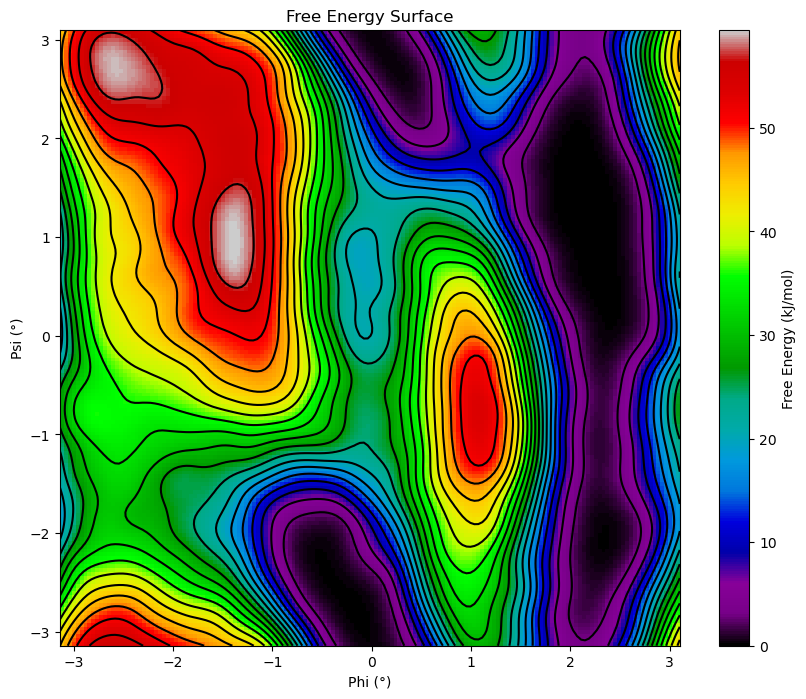

In [43]:
# Load the grid file
data = np.loadtxt('../Data/2Dmetadynamics/bck.last.lugano.grid.dat',comments=['#'])
phi = data[:, 0]  # assuming the first column is phi
psi = data[:, 1]  # assuming the second column is psi
fes = data[:, 2]  # free energy values

# Reshape the data to a grid. This step assumes the grid is square; adjust if needed.
grid_size = int(np.sqrt(phi.size))
phi = phi.reshape(grid_size, grid_size)
psi = psi.reshape(grid_size, grid_size)
fes = fes.reshape(grid_size, grid_size)

# Plot using imshow and contour lines
plt.figure(figsize=(10, 8))
im = plt.imshow(fes, origin='lower', extent=[phi.min(), phi.max(), psi.min(), psi.max()], aspect='auto', cmap='nipy_spectral')
contours = plt.contour(phi, psi, fes, 20, colors='black')  # 20 contour lines, adjust as needed
plt.colorbar(im, label='Free Energy (kJ/mol)')
plt.title('Free Energy Surface')
plt.xlabel('Phi (°)')
plt.ylabel('Psi (°)')
plt.show()


In [50]:
import imageio
def load_fes(filename):
    data = np.loadtxt(filename)
    phi = data[:, 0]
    psi = data[:, 1]
    fes = data[:, 2]
    
    grid_size = int(np.sqrt(phi.size))
    phi = phi.reshape(grid_size, grid_size)
    psi = psi.reshape(grid_size, grid_size)
    fes = fes.reshape(grid_size, grid_size)
    
    return phi, psi, fes

def plot_fes(phi, psi, fes, filename):
    plt.figure(figsize=(10, 8))
    im = plt.imshow(fes, origin='lower', extent=[phi.min(), phi.max(), psi.min(), psi.max()], aspect='auto', cmap='nipy_spectral')
    contours = plt.contour(phi, psi, fes, 20, colors='black')
    plt.colorbar(im, label='Free Energy (kJ/mol)')
    plt.title('Free Energy Surface')
    plt.xlabel('Phi (°)')
    plt.ylabel('Psi (°)')
    plt.savefig(filename)
    plt.close()

# Create individual frames for the GIF
filenames = []
for i in range(1, N+1):  # Replace N with the actual number of FES files
    phi, psi, fes = load_fes(f'fes_{i}.dat')
    output_filename = f'frame_{i}.png'
    plot_fes(phi, psi, fes, output_filename)
    filenames.append(output_filename)

# Create the animated GIF
with imageio.get_writer('fes_evolution.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the individual frames to clean up
for filename in filenames:
    os.remove(filename)


ModuleNotFoundError: No module named 'imageio'